# Testing the Trained Classifier

## Importing the Libraries

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report
from training_data import load_data, preprocess_data

## Downloading and Pre-processing the Dataset

In [2]:
X_train, y_train, X_test, y_test = load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
X_train_classifier, y_train_classifier, X_val_classifier, y_val_classifier, X_test_classifier, y_test_classifier = preprocess_data(X_train, y_train, X_test, y_test)

## Loading the Trained model

In [4]:
model = keras.models.load_model("classifier.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          3

## Confussion Matrix and Classification Report

predicting the test dataset

In [5]:
y_true = np.argmax(y_test_classifier,axis=1)
y_p = model.predict(X_test_classifier)
y_predicted = np.argmax(y_p,axis=1)

the confussion matrix for the classified testing dataset

In [6]:
print('confusion matrix')
print(confusion_matrix(y_true,y_predicted))

confusion matrix
[[ 978    0    1    0    0    0    0    1    0    0]
 [   0 1133    0    0    0    1    0    1    0    0]
 [   1    0 1028    0    0    0    0    3    0    0]
 [   0    1    0 1007    0    2    0    0    0    0]
 [   0    0    0    0  978    0    0    0    0    4]
 [   1    0    0    3    0  886    1    1    0    0]
 [   4    2    0    0    2    1  948    0    1    0]
 [   0    3    2    0    0    0    0 1023    0    0]
 [   1    0    0    0    0    0    0    0  972    1]
 [   0    0    1    0    3    3    0    3    3  996]]


classifiaction report from the test dataset for the trained model

In [7]:
print('Classification report')
print(classification_report(y_true,y_predicted))

Classification report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       1.00      1.00      1.00      1032
           3       1.00      1.00      1.00      1010
           4       0.99      1.00      1.00       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      1.00      0.99      1028
           8       1.00      1.00      1.00       974
           9       1.00      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



## Visual Representation

the test image visual representation

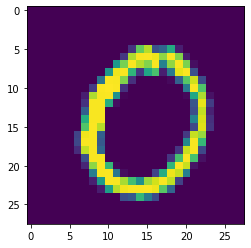

In [8]:
test_image = X_test[101]

plt.imshow(test_image)
plt.show()

the true label assiciated with the image

In [9]:
print("number_original: ", y_test[101])

number_original:  0


preparing the input test image to feed into the model

In [10]:
model_image = np.expand_dims(test_image,-1)
model_image = np.expand_dims(model_image,0)

predicting the image class from the model

In [11]:
prediction = model.predict(model_image)
number_predicted = np.argmax(prediction,axis=1)

predicted number by the model

In [12]:
print("number_predicted: ", int(number_predicted))

number_predicted:  0
